In [1]:
def accuracy(y_true, y_pred):
 """
 Function to calculate accuracy
 :param y_true: list of true values
 :param y_pred: list of predicted values
 :return: accuracy score
 """
 # initialize a simple counter for correct predictions
 correct_counter = 0
 # loop over all elements of y_true
 # and y_pred "together"
 for yt, yp in zip(y_true, y_pred):
     if yt == yp:
 # if prediction is equal to truth, increase the counter
         correct_counter += 1
 # return accuracy
 # which is correct predictions over the number of samples
 return correct_counter / len(y_true)

In [2]:
from sklearn import metrics
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]
metrics.accuracy_score(l1, l2)

0.625

In [3]:
def true_positive(y_true, y_pred):
 """
 Function to calculate True Positives
 :param y_true: list of true values
 :param y_pred: list of predicted values
 :return: number of true positives
 """
 # initialize
 tp = 0
 for yt, yp in zip(y_true, y_pred):
     if yt == 1 and yp == 1:
         tp += 1
 return tp
def true_negative(y_true, y_pred):
 """
 Function to calculate True Negatives
 :param y_true: list of true values
 :param y_pred: list of predicted values
 :return: number of true negatives
 """
 # initialize
 tn = 0
 for yt, yp in zip(y_true, y_pred):
     if yt == 0 and yp == 0:
         tn += 1
 return tn
def false_positive(y_true, y_pred):
 """
 Function to calculate False Positives
 :param y_true: list of true values
 :param y_pred: list of predicted values
 :return: number of false positives
 """
 # initialize
 fp = 0
 for yt, yp in zip(y_true, y_pred):
     if yt == 0 and yp == 1:
         fp += 1
 return fp
def false_negative(y_true, y_pred):
 """
 Function to calculate False Negatives
 :param y_true: list of true values
 :param y_pred: list of predicted values
 :return: number of false negatives
 """
 # initialize
 fn = 0
 for yt, yp in zip(y_true, y_pred):
    if yt == 1 and yp == 0:
        fn += 1
 return fn

In [4]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]
print(true_positive(l1, l2))
print(false_positive(l1, l2))
print(false_negative(l1, l2))
print(true_negative(l1, l2))

2
1
2
3


In [5]:
def precision(y_true, y_pred):
 """
 Function to calculate precision
 :param y_true: list of true values
 :param y_pred: list of predicted values
 :return: precision score
 """
 tp = true_positive(y_true, y_pred)
 fp = false_positive(y_true, y_pred)
 precision = tp / (tp + fp)
 return precision

In [6]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

precision(l1, l2)

0.6666666666666666

In [7]:
def recall(y_true, y_pred):
 """
 Function to calculate recall
 :param y_true: list of true values
 :param y_pred: list of predicted values
 :return: recall score
 """
 tp = true_positive(y_true, y_pred)
 fn = false_negative(y_true, y_pred)
 recall = tp / (tp + fn)
 return recall

In [8]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]
recall(l1, l2)

0.5

In [9]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0.02638412, 0.11114267, 0.31620708, 0.0490937, 0.0191491, 0.17554844, 0.15952202, 0.03819563, 0.11639273,
0.079377, 0.08584789, 0.39095342,
0.27259048, 0.03447096, 0.04644807,
0.03543574, 0.18521942, 0.05934905,
 0.61977213, 0.33056815]

In [10]:
precisions = []
recalls = []
# how we assumed these thresholds is a long story
thresholds = [0.0490937 , 0.05934905, 0.079377,
 0.08584789, 0.11114267, 0.11639273,
 0.15952202, 0.17554844, 0.18521942,
 0.27259048, 0.31620708, 0.33056815,
 0.39095342, 0.61977213]
# for every threshold, calculate predictions in binary
# and append calculated precisions and recalls
# to their respective lists
for i in thresholds:
 temp_prediction = [1 if x >= i else 0 for x in y_pred]
 p = precision(y_true, temp_prediction)
 r = recall(y_true, temp_prediction)
 precisions.append(p)
 recalls.append(r)

In [11]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Precision')

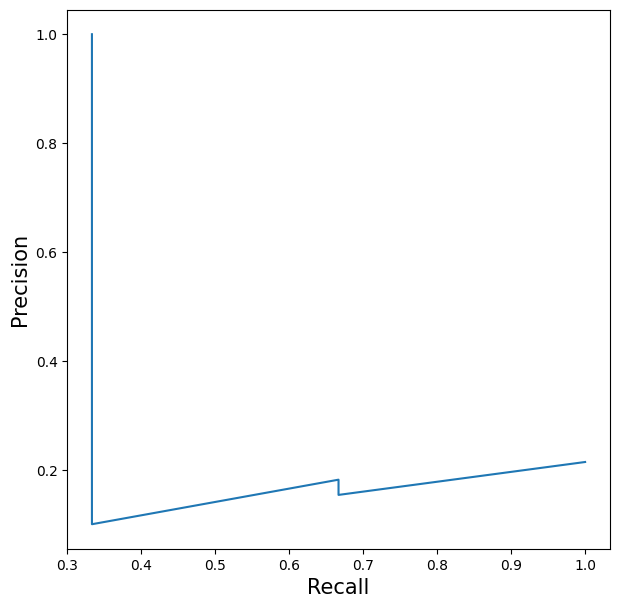

In [12]:
plt.figure(figsize=(7, 7))
plt.plot(recalls, precisions)
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)

In [13]:
def f1(y_true, y_pred):
 """
 Function to calculate f1 score
 :param y_true: list of true values
 :param y_pred: list of predicted values
 :return: f1 score
 """
 p = precision(y_true, y_pred)
 r = recall(y_true, y_pred)
 score = 2 * p * r / (p + r)
 return score

In [14]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
42
y_pred = [0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
f1(y_true, y_pred)

0.5714285714285715

In [15]:
def tpr(y_true, y_pred):
 """
 Function to calculate tpr
 :param y_true: list of true values
 :param y_pred: list of predicted values
 :return: tpr/recall
 """
 return recall(y_true, y_pred)

def fpr(y_true, y_pred):
 """
 Function to calculate fpr
 :param y_true: list of true values
 :param y_pred: list of predicted values
 :return: fpr
 """
 fp = false_positive(y_true, y_pred)
 tn = true_negative(y_true, y_pred)
 return fp / (tn + fp)


In [16]:
tpr_list = []
fpr_list = []
# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1,
 0, 0, 1, 0, 1, 0, 0, 1]
# predicted probabilities of a sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
 0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
 0.85, 0.15, 0.99]
# handmade thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5,
 0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]
# loop over all thresholds
for thresh in thresholds:
 # calculate predictions for a given threshold
     temp_pred = [1 if x >= thresh else 0 for x in y_pred]
 # calculate tpr
     temp_tpr = tpr(y_true, temp_pred)
 # calculate fpr
     temp_fpr = fpr(y_true, temp_pred)
 # append tpr and fpr to lists
     tpr_list.append(temp_tpr)
     fpr_list.append(temp_fpr)

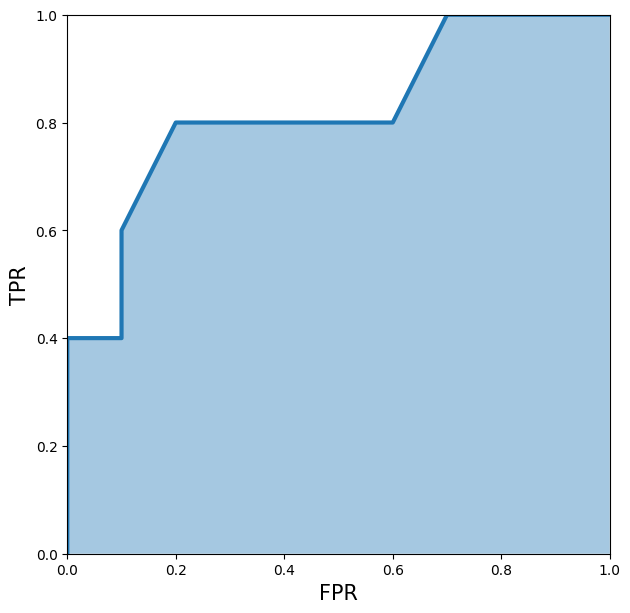

In [17]:
plt.figure(figsize=(7, 7))
plt.fill_between(fpr_list, tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list, lw=3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.show()

In [18]:
from sklearn import metrics
y_true = [0, 0, 0, 0, 1, 0, 1,
0, 0, 1, 0, 1, 0, 0, 1]
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
0.85, 0.15, 0.99]
metrics.roc_auc_score(y_true, y_pred)

0.8300000000000001

In [19]:
# empty lists to store true positive
# and false positive values
tp_list = []
fp_list = []
# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1,
 0, 0, 1, 0, 1, 0, 0, 1]
# predicted probabilities of a sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
 0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
 0.85, 0.15, 0.99]
# some handmade thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5,
 0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]
# loop over all thresholds
for thresh in thresholds:
# calculate predictions for a given threshold
     temp_pred = [1 if x >= thresh else 0 for x in y_pred]
 # calculate tp
     temp_tp = true_positive(y_true, temp_pred)
 # calculate fp
     temp_fp = false_positive(y_true, temp_pred)
 # append tp and fp to lists
     tp_list.append(temp_tp)
     fp_list.append(temp_fp)

In [27]:
import numpy as np

def log_loss(y_true, y_proba):
    """
    Function to calculate log loss
    :param y_true: list of true values
    :param y_proba: list of probabilities for 1
    :return: overall log loss
    """
    # define an epsilon value
    # this can also be an input
    # this value is used to clip probabilities
    epsilon = 1e-15
    
    # initialize empty list to store
    # individual losses
    loss = []

    # Loop over all true and predicted probability values
    for yt, yp in zip(y_true, y_proba):
        # adjust probability
        # 0 gets converted to 1e-15
        # 1 gets converted to 1-1e-15
        # Why? Think about it!
        yp = np.clip(yp, epsilon, 1 - epsilon)
        
        # calculate loss for one sample
        temp_loss = -1.0 * (
            yt * np.log(yp) +
            (1 - yt) * np.log(1 - yp)
        )
        
        # add to Loss list
        loss.append(temp_loss)
    
    # return mean Loss over all samples
    return np.mean(loss)


In [28]:
y_true = [0, 0, 0, 0, 1, 0, 1,
0, 0, 1, 0, 1, 0, 0, 1]
y_proba = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
0.85, 0.15, 0.99]
log_loss(y_true, y_proba)

0.49882711861432294

In [29]:
from sklearn import metrics
metrics.log_loss(y_true, y_proba)

0.49882711861432294

In [31]:
import numpy as np
def macro_precision(y_true, y_pred):
 """
 Function to calculate macro averaged precision
 :param y_true: list of true values
 :param y_pred: list of predicted values
 :return: macro precision score
 """

 # find the number of classes by taking
 # length of unique values in true list
 num_classes = len(np.unique(y_true))

 # initialize precision to 0
 precision = 0

 # loop over all classes
 for class_ in range(num_classes):

 # all classes except current are considered negative
     temp_true = [1 if p == class_ else 0 for p in y_true]
     temp_pred = [1 if p == class_ else 0 for p in y_pred]

 # calculate true positive for current class
     tp = true_positive(temp_true, temp_pred)

 # calculate false positive for current class
     fp = false_positive(temp_true, temp_pred)

 # calculate precision for current class
     temp_precision = tp / (tp + fp)

 # keep adding precision for all classes
     precision += temp_precision
 # calculate and return average precision over all classes
     precision /= num_classes
 return precision

In [33]:
import numpy as np
def micro_precision(y_true, y_pred):
 """
 Function to calculate micro averaged precision
 :param y_true: list of true values
 :param y_pred: list of predicted values
 :return: micro precision score
 """

 # find the number of classes by taking
 # length of unique values in true list
 num_classes = len(np.unique(y_true))

 # initialize tp and fp to 0
 tp = 0
 fp = 0

 # loop over all classes
 for class_ in range(num_classes):
 # all classes except current are considered negative
     temp_true = [1 if p == class_ else 0 for p in y_true]
     temp_pred = [1 if p == class_ else 0 for p in y_pred]

 # calculate true positive for current class
 # and update overall tp
     tp += true_positive(temp_true, temp_pred)

 # calculate false positive for current class
 # and update overall tp
     fp += false_positive(temp_true, temp_pred)

 # calculate and return overall precision
     precision = tp / (tp + fp)
 return precision

In [37]:
from collections import Counter
import numpy as np

def true_positive(y_true, y_pred):
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            tp += 1
    return tp

def false_positive(y_true, y_pred):
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 1:
            fp += 1
    return fp

def weighted_precision(y_true, y_pred):
    """
    Function to calculate weighted averaged precision
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: weighted precision score
    """

    # find the number of classes by taking
    # length of unique values in true list
    num_classes = len(np.unique(y_true))

    # create class:sample count dictionary
    # it looks something like this:
    # {0: 20, 1:15, 2:21}
    class_counts = Counter(y_true)

    # initialize precision to 0
    precision = 0

    # loop over all classes
    for class_ in range(num_classes):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]

        # calculate tp and fp for class
        tp = true_positive(temp_true, temp_pred)
        fp = false_positive(temp_true, temp_pred)

        # calculate precision of class
        temp_precision = tp / (tp + fp) if (tp + fp) > 0 else 0

        # multiply precision with count of samples in class
        weighted_precision = class_counts[class_] * temp_precision

        # add to overall precision
        precision += weighted_precision
    
    # calculate overall precision by dividing by
    # total number of samples
    overall_precision = precision / len(y_true)
    return overall_precision


In [39]:
from sklearn import metrics
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]
macro_precision(y_true, y_pred)
metrics.precision_score(y_true, y_pred, average="macro")
micro_precision(y_true, y_pred)
metrics.precision_score(y_true, y_pred, average="micro")
weighted_precision(y_true, y_pred)
metrics.precision_score(y_true, y_pred, average="weighted")

0.39814814814814814

In [41]:
from collections import Counter
import numpy as np
def weighted_f1(y_true, y_pred):
 """
 Function to calculate weighted f1 score
 :param y_true: list of true values
 :param y_proba: list of predicted values
 :return: weighted f1 score
 """

 # find the number of classes by taking
 # length of unique values in true list
 num_classes = len(np.unique(y_true))

 # create class:sample count dictionary
 # it looks something like this:
 # {0: 20, 1:15, 2:21}
 class_counts = Counter(y_true)

 # initialize f1 to 0
 f1 = 0

 # loop over all classes
 for class_ in range(num_classes):
 # all classes except current are considered negative
     temp_true = [1 if p == class_ else 0 for p in y_true]
     temp_pred = [1 if p == class_ else 0 for p in y_pred]

 # calculate precision and recall for class
     p = precision(temp_true, temp_pred)
     r = recall(temp_true, temp_pred)

 # calculate f1 of class
     if p + r != 0:
         temp_f1 = 2 * p * r / (p + r)
     else:
         temp_f1 = 0

 # multiply f1 with count of samples in class
     weighted_f1 = class_counts[class_] * temp_f1

 # add to f1 precision
     f1 += weighted_f1
     # calculate overall F1 by dividing by
 # total number of samples
     overall_f1 = f1 / len(y_true)
 return overall_f1

In [42]:
from sklearn import metrics
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]
weighted_f1(y_true, y_pred)
metrics.f1_score(y_true, y_pred, average="weighted")

0.4126984126984127

Text(0.5, 57.249999999999986, 'Predicted Labels')

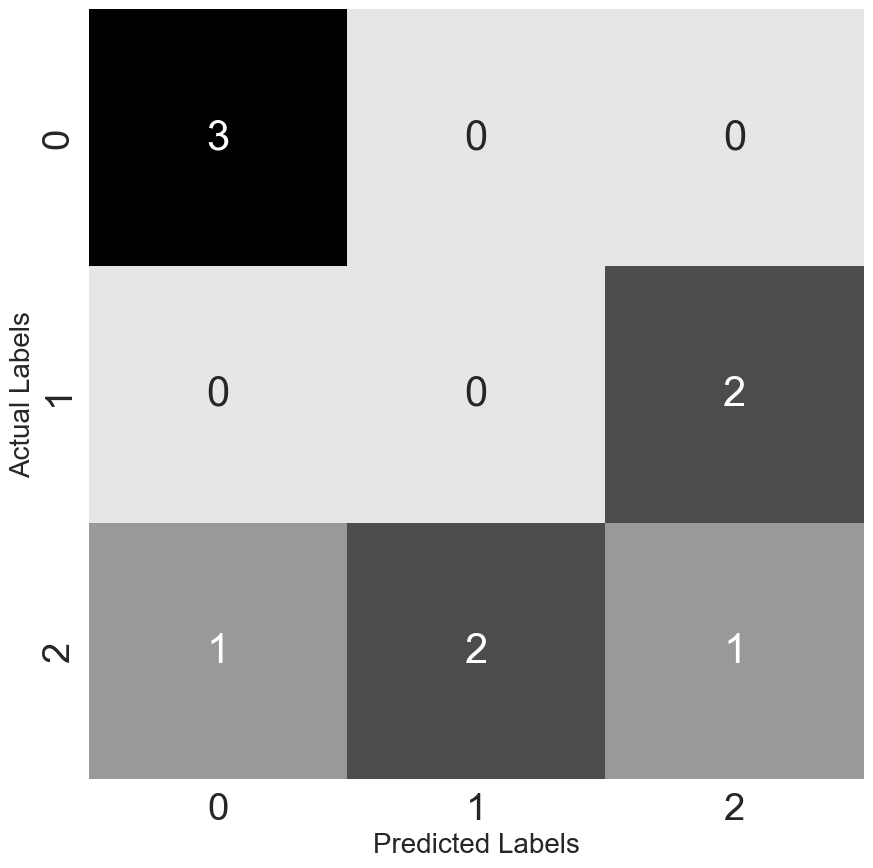

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
# some targets
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
#some predictions
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]
# get confusion matrix from sklearn
cm = metrics.confusion_matrix(y_true, y_pred)
# plot using matplotlib and seaborn
plt.figure(figsize=(10, 10))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0,
as_cmap=True)
sns.set(font_scale=2.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False)
plt.ylabel('Actual Labels', fontsize=20)
plt.xlabel('Predicted Labels', fontsize=20)

In [47]:
def pk(y_true, y_pred, k):
 """
 This function calculates precision at k
 for a single sample
 :param y_true: list of values, actual classes
 :param y_pred: list of values, predicted classes
 :param k: the value for k
 :return: precision at a given value k
 """
 # if k is 0, return 0. we should never have this
 # as k is always >= 1
 if k == 0:
     return 0
 # we are interested only in top-k predictions
 y_pred = y_pred[:k]
 # convert predictions to set
 pred_set = set(y_pred)
 # convert actual values to set
 true_set = set(y_true)
 # find common values
 common_values = pred_set.intersection(true_set)
 # return length of common values over k
 return len(common_values) / len(y_pred[:k])

In [49]:
def apk(y_true, y_pred, k):
 """
 This function calculates average precision at k
 for a single sample
 :param y_true: list of values, actual classes
 :param y_pred: list of values, predicted classes
 :return: average precision at a given value k
 """
 # initialize p@k list of values
 pk_values = []
 # loop over all k. from 1 to k + 1
 for i in range(1, k + 1):
 # calculate p@i and append to list
     pk_values.append(pk(y_true, y_pred, i))
 # if we have no values in the list, return 0
 if len(pk_values) == 0:
     return 0
 # else, we return the sum of list over length of list
 return sum(pk_values) / len(pk_values)

In [61]:
y_true = [
    [1, 2, 3],
    [0, 2],
    [1],
    [2, 3],
    [1, 0],
    []
]

y_pred = [
    [0, 1, 2],
    [1],
    [0, 2, 3],
    [2, 3, 4, 0],
    [0, 1, 2],
    [0]
]



# Loop to print the results
for i in range(len(y_true)):
    for j in range(1, 4):
        print(f"""
y_true={y_true[i]},
y_pred={y_pred[i]},
AP@{j}={apk(y_true[i], y_pred[i], k=j)}
""")



y_true=[1, 2, 3],
y_pred=[0, 1, 2],
AP@1=0.0


y_true=[1, 2, 3],
y_pred=[0, 1, 2],
AP@2=0.25


y_true=[1, 2, 3],
y_pred=[0, 1, 2],
AP@3=0.38888888888888884


y_true=[0, 2],
y_pred=[1],
AP@1=0.0


y_true=[0, 2],
y_pred=[1],
AP@2=0.0


y_true=[0, 2],
y_pred=[1],
AP@3=0.0


y_true=[1],
y_pred=[0, 2, 3],
AP@1=0.0


y_true=[1],
y_pred=[0, 2, 3],
AP@2=0.0


y_true=[1],
y_pred=[0, 2, 3],
AP@3=0.0


y_true=[2, 3],
y_pred=[2, 3, 4, 0],
AP@1=1.0


y_true=[2, 3],
y_pred=[2, 3, 4, 0],
AP@2=1.0


y_true=[2, 3],
y_pred=[2, 3, 4, 0],
AP@3=1.0


y_true=[1, 0],
y_pred=[0, 1, 2],
AP@1=1.0


y_true=[1, 0],
y_pred=[0, 1, 2],
AP@2=1.0


y_true=[1, 0],
y_pred=[0, 1, 2],
AP@3=1.0


y_true=[],
y_pred=[0],
AP@1=0.0


y_true=[],
y_pred=[0],
AP@2=0.0


y_true=[],
y_pred=[0],
AP@3=0.0



In [63]:
def mapk(y_true, y_pred, k):
 """
 This function calculates mean avg precision at k
 for a single sample
 :param y_true: list of values, actual classes
 :param y_pred: list of values, predicted classes
 :return: mean avg precision at a given value k
 """
 # initialize empty list for apk values
 apk_values = []
 # loop over all samples
 for i in range(len(y_true)):
 # store apk values for every sample
     apk_values.append(
     apk(y_true[i], y_pred[i], k=k)
 )
 # return mean of apk values list
 return sum(apk_values) / len(apk_values)


In [65]:
 y_true = [
[1, 2, 3],
[0, 2],
[1],
[2, 3],
[1, 0],
[]
]
y_pred = [
[0, 1, 2],
[1],
[0, 2, 3],
[2, 3, 4, 0],
[0, 1, 2],
[0]
]
mapk(y_true, y_pred, k=1)
mapk(y_true, y_pred, k=2)
mapk(y_true, y_pred, k=3)
mapk(y_true, y_pred, k=4)

0.39814814814814814

In [66]:
import numpy as np
def apk(actual, predicted, k=10):
 """
 Computes the average precision at k.
 This function computes the AP at k between two lists of
 items.
 Parameters
 ----------
 actual : list
 A list of elements to be predicted (order doesn't matter)
 predicted : list
 A list of predicted elements (order does matter)
 k : int, optional
 The maximum number of predicted elements
 Returns
 -------
 score : double
 The average precision at k over the input lists
 """
 if len(predicted)>k:
     predicted = predicted[:k]
 score = 0.0
 num_hits = 0.0
 for i,p in enumerate(predicted):
     if p in actual and p not in predicted[:i]:
         num_hits += 1.0
         score += num_hits / (i+1.0)
 if not actual:
     return 0.0
 return score / min(len(actual), k)

In [67]:
import numpy as np
def mean_absolute_error(y_true, y_pred):
 """
 This function calculates mae
 :param y_true: list of real numbers, true values
 :param y_pred: list of real numbers, predicted values
 :return: mean absolute error
 """
 # initialize error at 0
 error = 0
 # loop over all samples in the true and predicted list
 for yt, yp in zip(y_true, y_pred):
 # calculate absolute error
 # and add to error
     error += np.abs(yt - yp)
 # return mean error
 return error / len(y_true)

In [68]:
def mean_squared_error(y_true, y_pred):
 """
 This function calculates mse
 :param y_true: list of real numbers, true values
 :param y_pred: list of real numbers, predicted values
 :return: mean squared error
 """
 # initialize error at 0
 error = 0
 # loop over all samples in the true and predicted list
 for yt, yp in zip(y_true, y_pred):
 # calculate squared error
 # and add to error
     error += (yt - yp) ** 2
 # return mean error
 return error / len(y_true)

In [69]:
import numpy as np
def mean_squared_log_error(y_true, y_pred):
 """
 This function calculates msle
 :param y_true: list of real numbers, true values
 :param y_pred: list of real numbers, predicted values
 :return: mean squared logarithmic error
 """
 # initialize error at 0
 error = 0
 # loop over all samples in true and predicted list
 for yt, yp in zip(y_true, y_pred):
 # calculate squared log error
 # and add to error
     error += (np.log(1 + yt) - np.log(1 + yp)) ** 2
 # return mean error
 return error / len(y_true)

In [70]:
def mean_percentage_error(y_true, y_pred):
 """
 This function calculates mpe
 :param y_true: list of real numbers, true values
 :param y_pred: list of real numbers, predicted values
 :return: mean percentage error
 """
 # initialize error at 0
 error = 0
 # loop over all samples in true and predicted list
 for yt, yp in zip(y_true, y_pred):
 # calculate percentage error
 # and add to error
     error += (yt - yp) / yt
 # return mean percentage error
 return error / len(y_true)

In [71]:
import numpy as np
def mean_abs_percentage_error(y_true, y_pred):
 """
 This function calculates MAPE
 :param y_true: list of real numbers, true values
 :param y_pred: list of real numbers, predicted values
 :return: mean absolute percentage error
 """
 # initialize error at 0
 error = 0
 # loop over all samples in true and predicted list
 for yt, yp in zip(y_true, y_pred):
 # calculate percentage error
 # and add to error
     error += np.abs(yt - yp) / yt
 # return mean percentage error
 return error / len(y_true)

In [73]:
import numpy as np
def r2(y_true, y_pred):
 """
 This function calculates r-squared score
 :param y_true: list of real numbers, true values
 :param y_pred: list of real numbers, predicted values
 :return: r2 score
 """

 # calculate the mean value of true values
 mean_true_value = np.mean(y_true)

 # initialize numerator with 0
 numerator = 0
 # initialize denominator with 0
 denominator = 0

 # loop over all true and predicted values
 for yt, yp in zip(y_true, y_pred):
 # update numerator
     numerator += (yt - yp) ** 2
 # update denominator
     denominator += (yt - mean_true_value) ** 2
 # calculate the ratio
 ratio = numerator / denominator
 # return 1 - ratio
 return 1 - ratio

In [74]:
import numpy as np
def mae_np(y_true, y_pred):
 return np.mean(np.abs(y_true - y_pred))

In [75]:
from sklearn import metrics
y_true = [1, 2, 3, 1, 2, 3, 1, 2, 3]
y_pred = [2, 1, 3, 1, 2, 3, 3, 1, 2]
metrics.cohen_kappa_score(y_true, y_pred, weights="quadratic")
metrics.accuracy_score(y_true, y_pred)

0.4444444444444444

In [77]:
def mcc(y_true, y_pred):
 """
 This function calculates Matthew's Correlation Coefficient
 for binary classification.
 :param y_true: list of true values
 :param y_pred: list of predicted values
 :return: mcc score
 """
 tp = true_positive(y_true, y_pred)
 tn = true_negative(y_true, y_pred)
 fp = false_positive(y_true, y_pred)
 fn = false_negative(y_true, y_pred)
 numerator = (tp * tn) - (fp * fn)
 denominator = (
 (tp + fp) *
 (fn + tn) *
 (fp + tn) *
 (tp + fn)
 )
 denominator = denominator ** 0.5
 return numerator/denominator